In [1]:
import pandas as pd

birddata = pd.read_csv("bird_tracking.csv")
birddata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61920 entries, 0 to 61919
Data columns (total 9 columns):
Unnamed: 0            61920 non-null int64
altitude              61920 non-null int64
date_time             61920 non-null object
device_info_serial    61920 non-null int64
direction             61477 non-null float64
latitude              61920 non-null float64
longitude             61920 non-null float64
speed_2d              61477 non-null float64
bird_name             61920 non-null object
dtypes: float64(4), int64(3), object(2)
memory usage: 4.3+ MB


In [2]:
birddata.head()

,Unnamed: 0,altitude,date_time,device_info_serial,direction,latitude,longitude,speed_2d,bird_name
0,0,71,2013-08-15 00:18:08+00,851,-150.469753,49.419860,2.120733,0.150000,Eric
1,1,68,2013-08-15 00:48:07+00,851,-136.151141,49.419880,2.120746,2.438360,Eric
2,2,68,2013-08-15 01:17:58+00,851,160.797477,49.420310,2.120885,0.596657,Eric
3,3,73,2013-08-15 01:47:51+00,851,32.769360,49.420359,2.120859,0.310161,Eric
4,4,69,2013-08-15 02:17:42+00,851,45.191230,49.420331,2.120887,0.193132,Eric


In [3]:
import matplotlib.pyplot as plt
import numpy as np

ix = birddata.bird_name == "Eric"
x , y = birddata.longitude[ix] , birddata.latitude[ix]

plt.figure(figsize=(7,7))
plt.plot(x,y,".")
plt.show()

<Figure size 700x700 with 1 Axes>

In [4]:
bird_names = pd.unique(birddata.bird_name)
print(bird_names)

['Eric' 'Nico' 'Sanne']


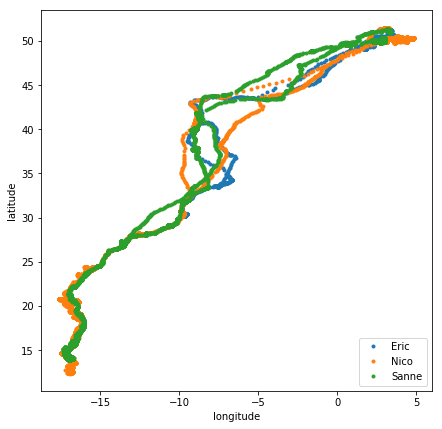

In [5]:
plt.figure(figsize=(7,7))
    
    
for bird_name in bird_names:
    ix = birddata.bird_name == bird_name
    x , y = birddata.longitude[ix] , birddata.latitude[ix]
 
    plt.plot(x,y,".",label=bird_name)
plt.xlabel("longitude")
plt.ylabel("latitude")
plt.legend(loc="lower right")
plt.show()

(array([3., 1., 0., 0., 1., 2., 2., 0., 0., 1.]),
 array([0.15      , 0.59422108, 1.03844216, 1.48266324, 1.92688432,
        2.3711054 , 2.81532648, 3.25954756, 3.70376864, 4.14798972,
        4.5922108 ]),
 <a list of 10 Patch objects>)

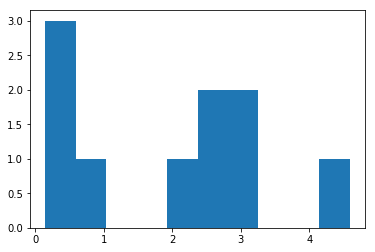

In [6]:
ix = birddata.bird_name == "Eric"
speed = birddata.speed_2d[ix]
plt.hist(speed[:10])

In [7]:
import numpy as np

np.isnan(speed)

0        False
1        False
2        False
3        False
4        False
5        False
6        False
7        False
8        False
9        False
10       False
11       False
12       False
13       False
14       False
15       False
16       False
17       False
18       False
19       False
20       False
21       False
22       False
23       False
24       False
25       False
26       False
27       False
28       False
29       False
         ...  
19765    False
19766    False
19767    False
19768    False
19769    False
19770    False
19771     True
19772    False
19773    False
19774    False
19775    False
19776    False
19777    False
19778     True
19779    False
19780    False
19781    False
19782    False
19783    False
19784    False
19785    False
19786    False
19787    False
19788    False
19789    False
19790    False
19791    False
19792    False
19793    False
19794    False
Name: speed_2d, Length: 19795, dtype: bool

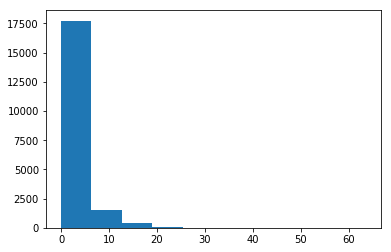

In [8]:
ix = birddata.bird_name == "Eric"
speed = birddata.speed_2d[ix]
ind= np.isnan(speed)
plt.hist(speed[~ind])
plt.show()

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


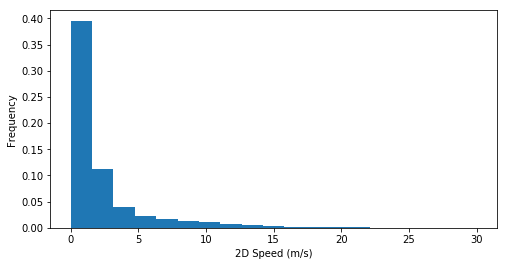

In [9]:
plt.figure(figsize=(8,4))
speed = birddata.speed_2d[birddata.bird_name=="Eric"]
ind = np.isnan(speed)
plt.hist(speed[~ind], bins=np.linspace(0,30,20),normed=True)
plt.xlabel("2D Speed (m/s)")
plt.ylabel("Frequency")
plt.show()

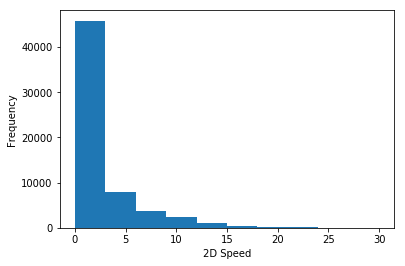

In [10]:
birddata.speed_2d.plot(kind="hist",range=[0,30]) 
plt.xlabel("2D Speed") 
plt.show()

In [11]:
birddata.columns

Index(['Unnamed: 0', 'altitude', 'date_time', 'device_info_serial',
       'direction', 'latitude', 'longitude', 'speed_2d', 'bird_name'],
      dtype='object')

In [12]:
birddata.date_time[0:3]

0    2013-08-15 00:18:08+00
1    2013-08-15 00:48:07+00
2    2013-08-15 01:17:58+00
Name: date_time, dtype: object

In [13]:
import datetime

datetime.datetime.today()
datetime.datetime(2016,2,22,15,14,34,994336)

datetime.datetime(2016, 2, 22, 15, 14, 34, 994336)

In [14]:
time_1=datetime.datetime.today()
time_2=datetime.datetime.today()
time_1 - time_2

datetime.timedelta(-1, 86399, 999955)

In [15]:
time_2 = datetime.datetime.today()

In [16]:
time_2-time_1

datetime.timedelta(0, 0, 576481)

In [17]:
date_str = birddata.date_time[0]
type(date_str)

str

In [18]:
date_str

'2013-08-15 00:18:08+00'

In [19]:
#date_str[0:-12]
date_str[0:-3]

'2013-08-15 00:18:08'

In [20]:
datetime.datetime.strptime(date_str[:-3],'%Y-%m-%d %H:%M:%S')

timestamps = []
for k in range(len(birddata)):
    datestring = birddata.date_time.iloc[k][:-3]
    timestamps.append(datetime.datetime.strptime(datestring,'%Y-%m-%d %H:%M:%S'))

In [21]:
birddata["timestamp"] = pd.Series(timestamps,index=birddata.index)
birddata.head()

,Unnamed: 0,altitude,date_time,device_info_serial,direction,latitude,longitude,speed_2d,bird_name,timestamp
0,0,71,2013-08-15 00:18:08+00,851,-150.469753,49.419860,2.120733,0.150000,Eric,2013-08-15 00:18:08
1,1,68,2013-08-15 00:48:07+00,851,-136.151141,49.419880,2.120746,2.438360,Eric,2013-08-15 00:48:07
2,2,68,2013-08-15 01:17:58+00,851,160.797477,49.420310,2.120885,0.596657,Eric,2013-08-15 01:17:58
3,3,73,2013-08-15 01:47:51+00,851,32.769360,49.420359,2.120859,0.310161,Eric,2013-08-15 01:47:51
4,4,69,2013-08-15 02:17:42+00,851,45.191230,49.420331,2.120887,0.193132,Eric,2013-08-15 02:17:42


In [22]:
birddata.timestamp[4]-birddata.timestamp[3]

times = birddata.timestamp[birddata.bird_name=="Eric"]
elapsed_time = [time-times[0] for time in times]

In [23]:
elapsed_time[0]

Timedelta('0 days 00:00:00')

In [24]:
elapsed_time[1000]

Timedelta('12 days 02:02:00')

In [25]:
elapsed_time[1000]/datetime.timedelta(days=1)

12.084722222222222

In [26]:
elapsed_time[1000]/datetime.timedelta(hours=1)

290.03333333333336

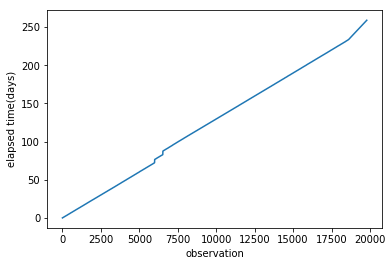

In [27]:
birddata.timestamp[4]-birddata.timestamp[3]

times = birddata.timestamp[birddata.bird_name=="Eric"]
elapsed_time = [time-times[0] for time in times]
plt.plot(np.array(elapsed_time)/datetime.timedelta(days=1))
plt.xlabel("observation")
plt.ylabel("elapsed time(days)")
plt.show()

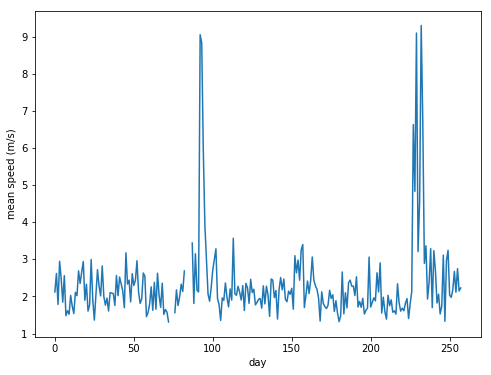

In [28]:
data = birddata[birddata.bird_name=="Eric"]
times = data.timestamp
elapsed_time = [time - times[0] for time in times]
elapsed_days = np.array(elapsed_time)/datetime.timedelta(days=1)
next_day = 1
inds = []
daily_mean_speed = []
for (i,t) in enumerate(elapsed_days):
    if t < next_day:
        inds.append(i)
    else:
        daily_mean_speed.append(np.mean(data.speed_2d[inds]))
        next_day += 1
        inds = []

plt.figure(figsize=(8,6))
plt.plot(daily_mean_speed)
plt.xlabel("day")
plt.ylabel("mean speed (m/s)")
plt.show()